<center>
    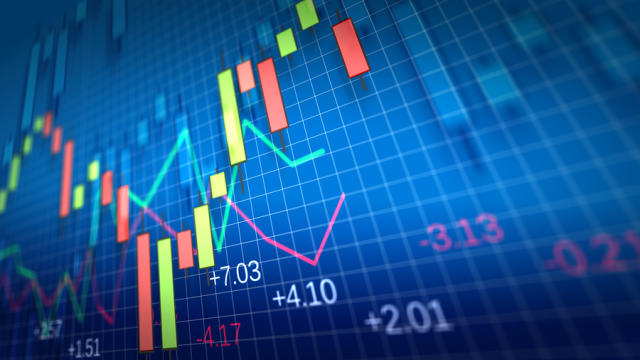 
</center>

----------

<h1 align="center"> Machine Learning Project: Time Series Analysis </h1>
<br>
<center align="center"> <font size='4'>  Presented by: </font><font size='4' color='#33AAFBD'>Pascal Ngo </font></center>
<br>

----------

# Table of Contents

    1. Data Preparation
    2. Data Exploration
    3. Data Vizualisation
    4. Model Prediction
    5. Model Interpretation

# Objective

This notebook represents a comprehensive Machine Learning project focused on Microsoft Stocks price prediction. The project follows a systematic approach to building a predictive model. 

Time Series Analysis involves studying historical data patterns and statistical indicators to recognize and forecast trends within sequential data points, such as stock prices over time.

In this project, our primary emphasis will be on conducting time series analysis. Specifically, we'll utilize a dataset comprising Microsoft stock prices spanning from April 2015 to April 2021. Our objective is to construct a predictive model that can estimate future stock prices based on historical patterns.

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

from matplotlib.dates import MonthLocator, DateFormatter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

#### Data Preparation

In [61]:
df = pd.read_csv("/Microsoft_Stock.csv")

In [71]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


#### Data Exploration

In [9]:
df.shape

(1511, 6)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [19]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [64]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S')
df.set_index('Date', inplace=True)

#### Data Vizualisation

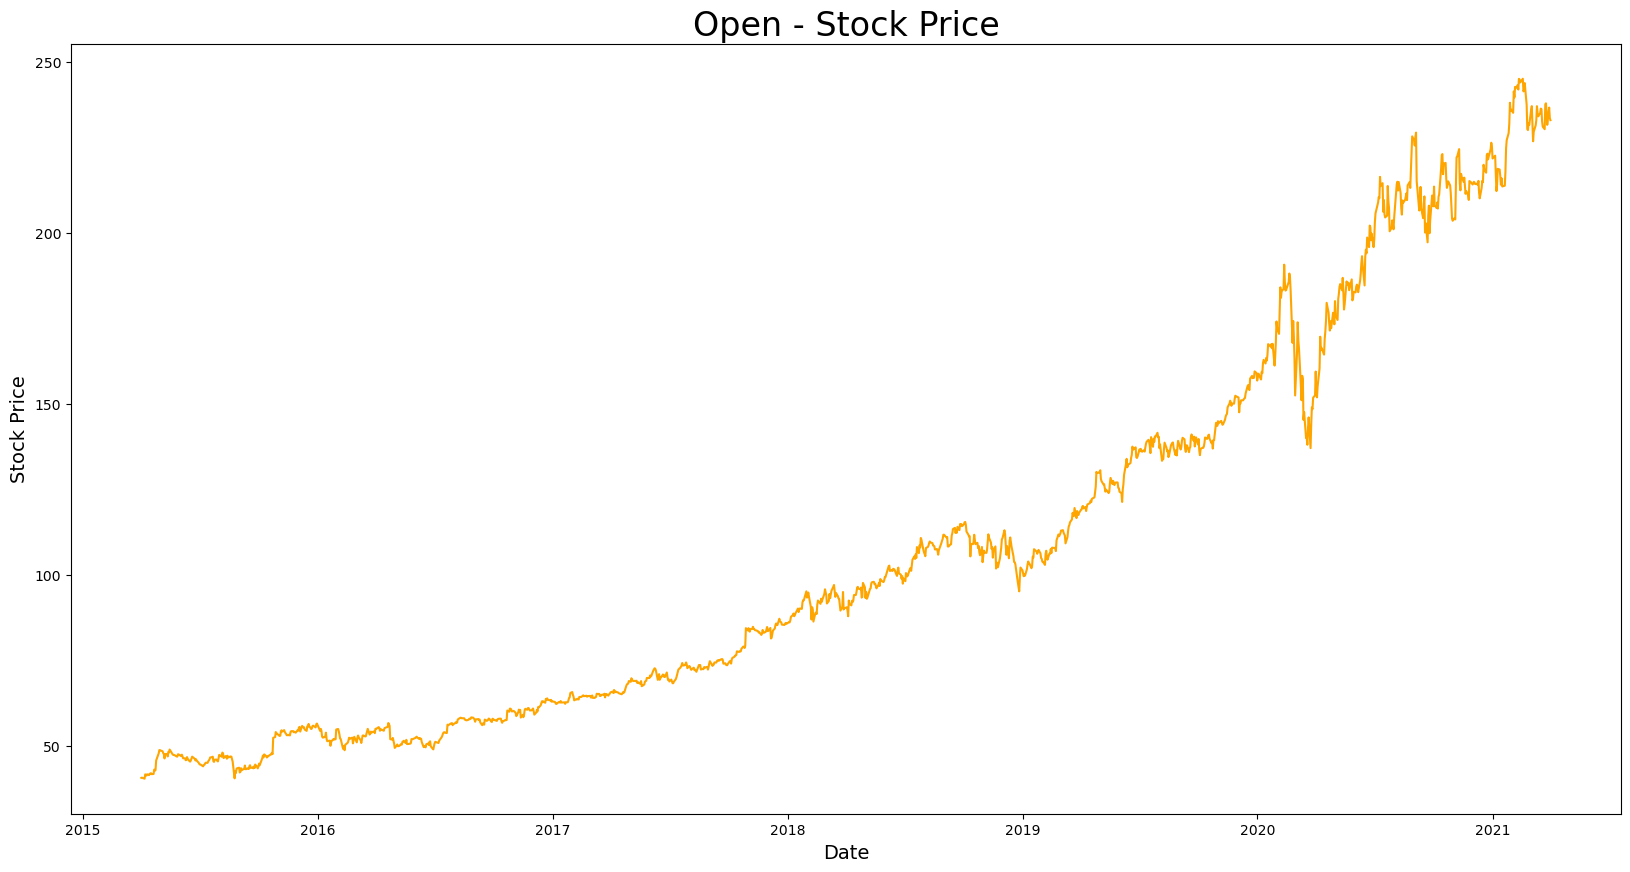

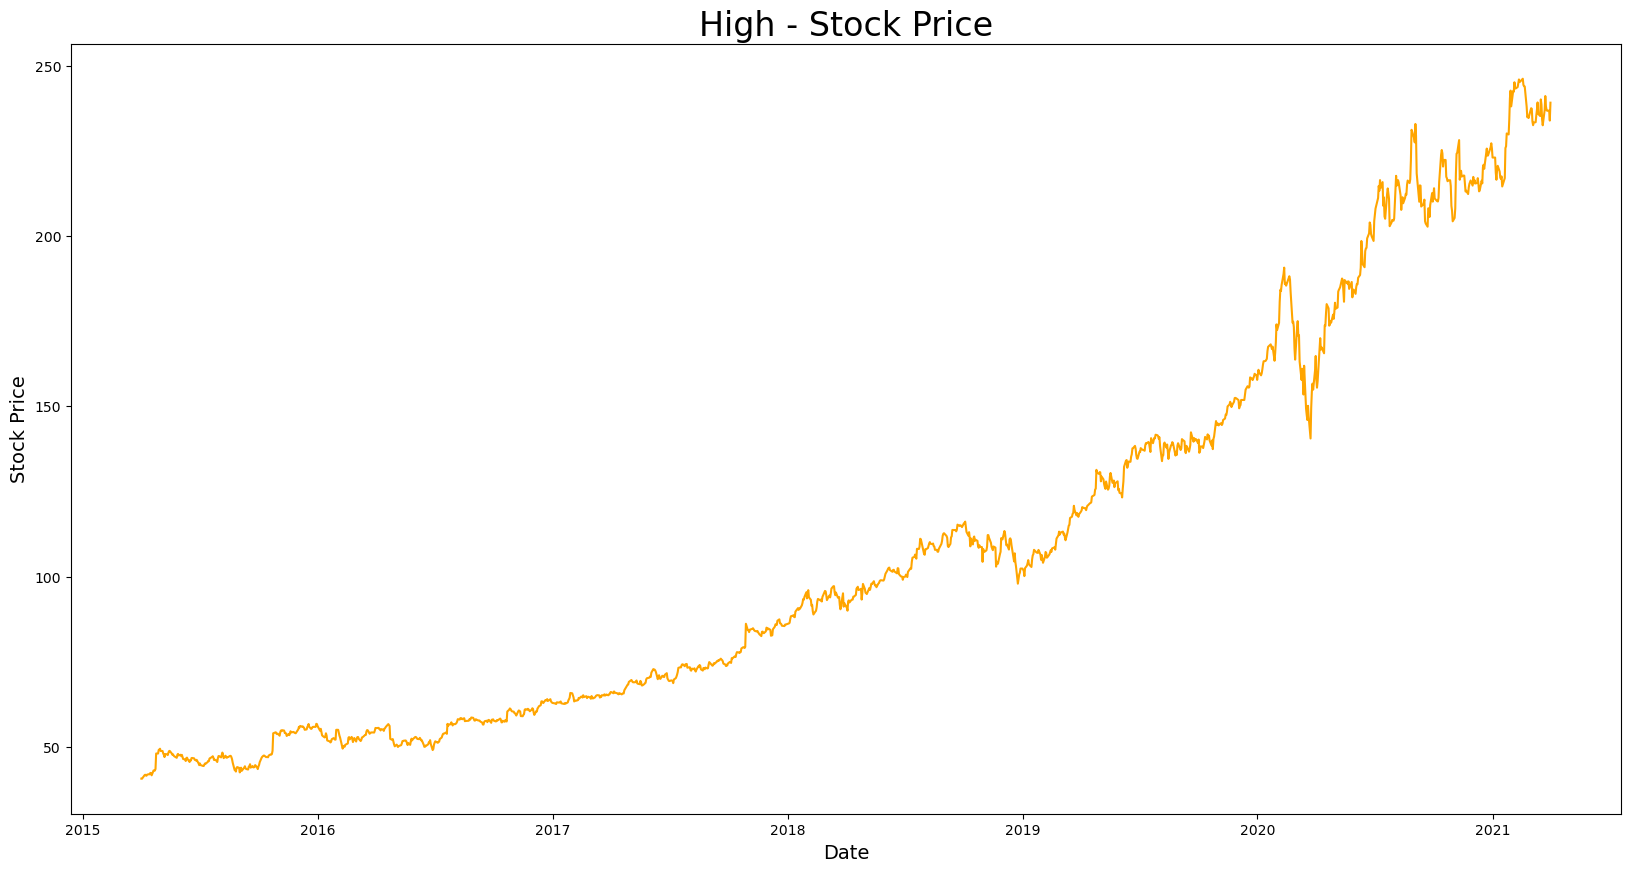

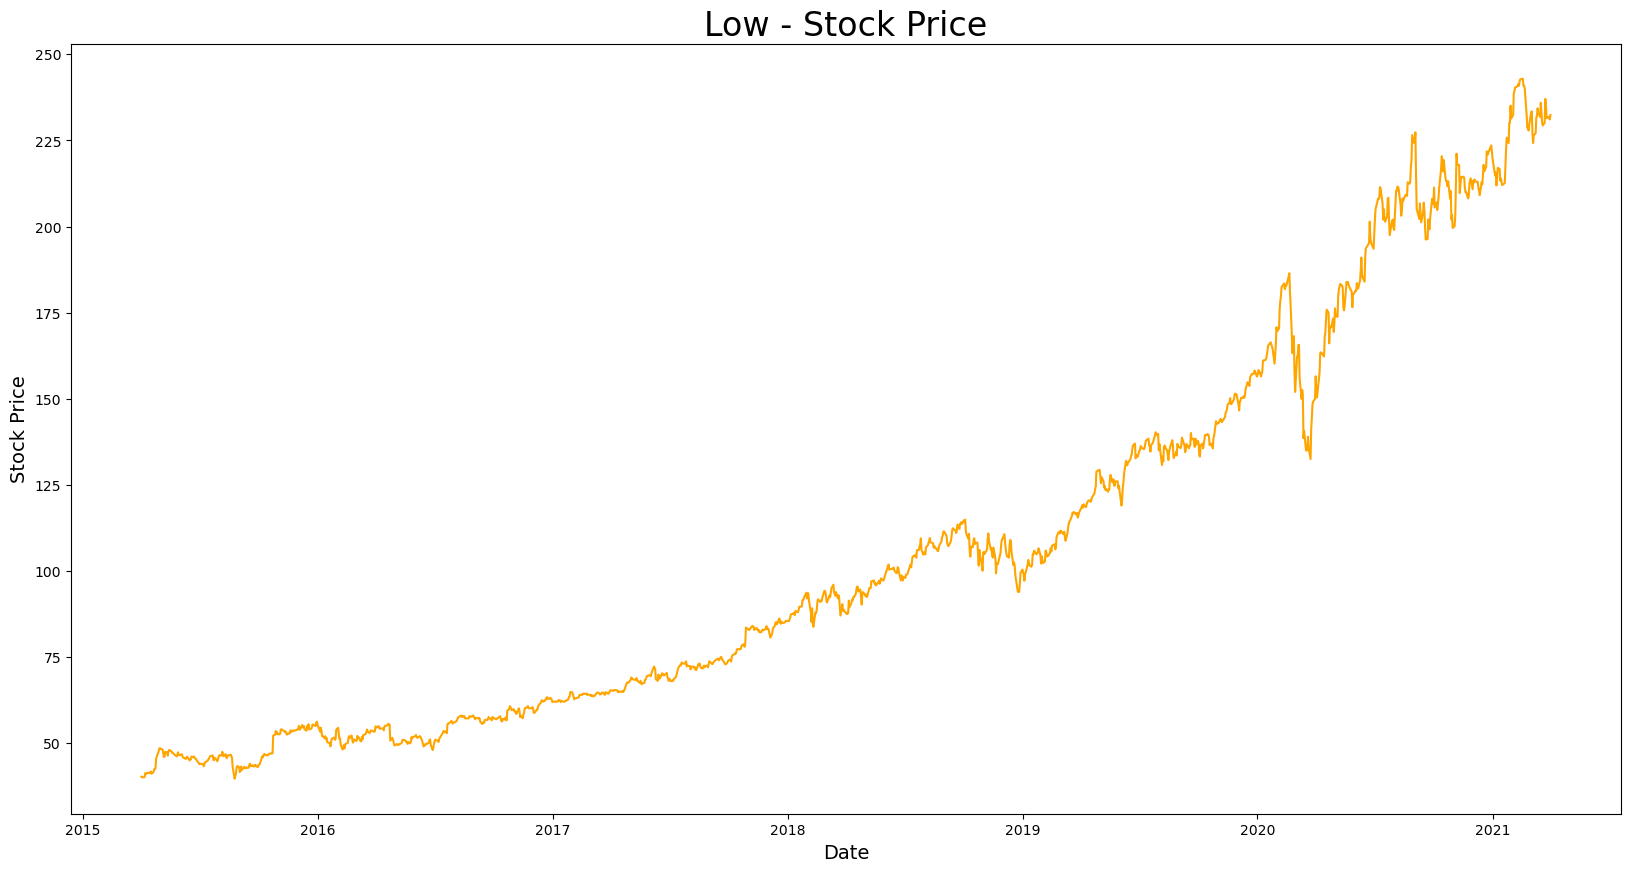

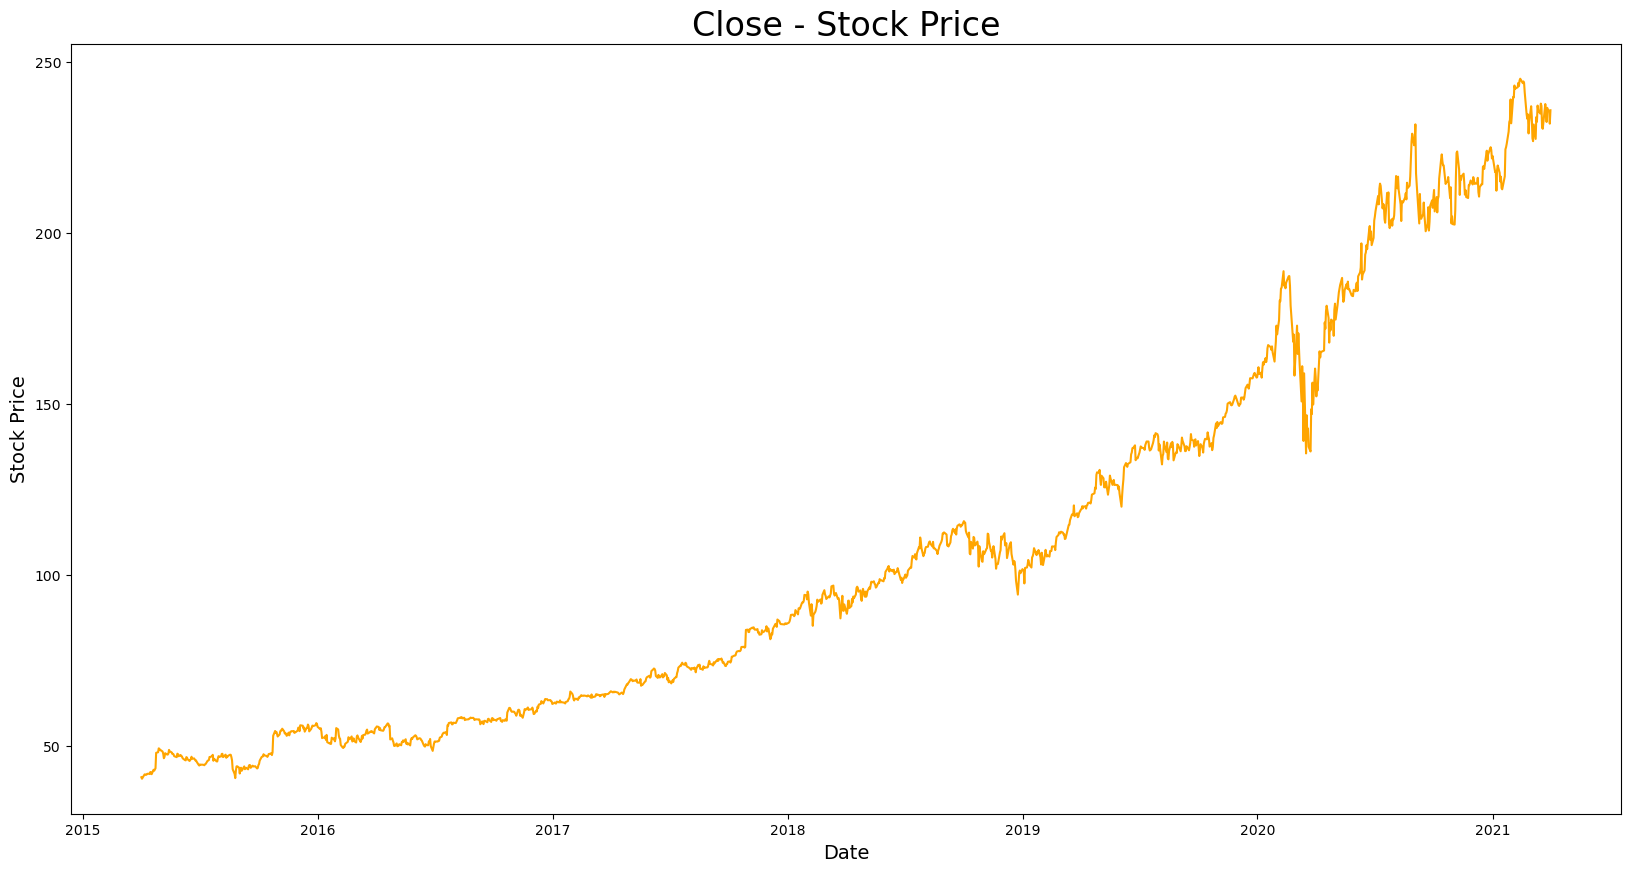

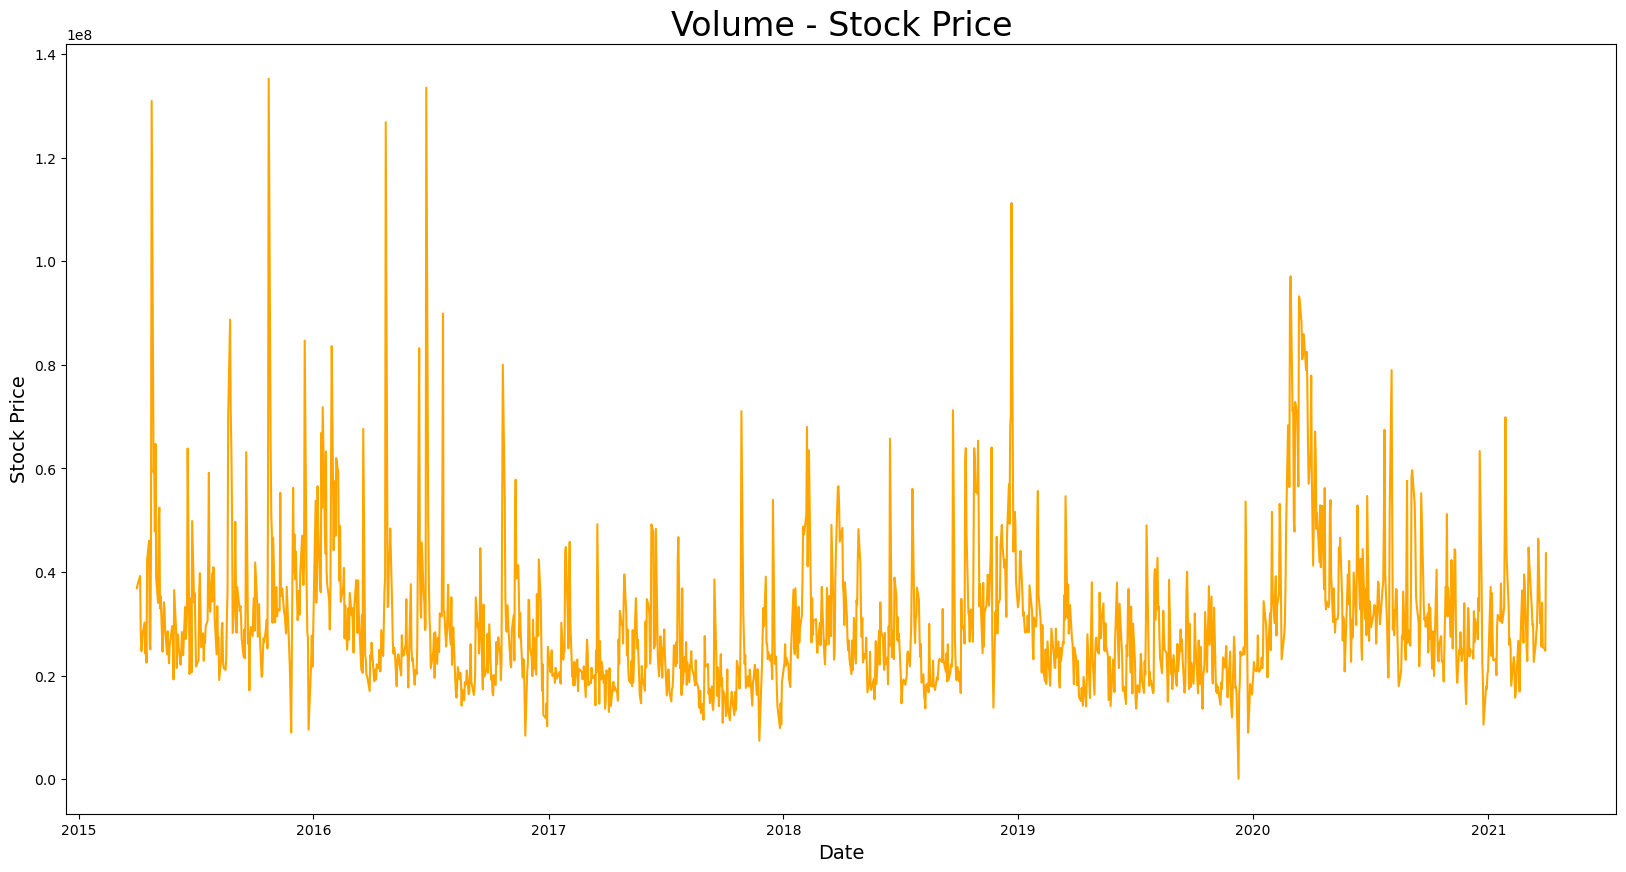

In [65]:
for col in df.columns:
    plt.figure(figsize=(20, 10))
    sns.lineplot(x='Date', y=df[col], data=df, color='orange')
    plt.title(f'{col} - Stock Price', fontsize=24)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price', fontsize=14)
    plt.show()

Consistently since 2015, the stock price has shown a persistent upward trend, steadily increasing over the years.

##### Moving average analysis:
Employing moving average analysis helps in smoothing data, identifying trends,and providing inputs for predictive modeling.

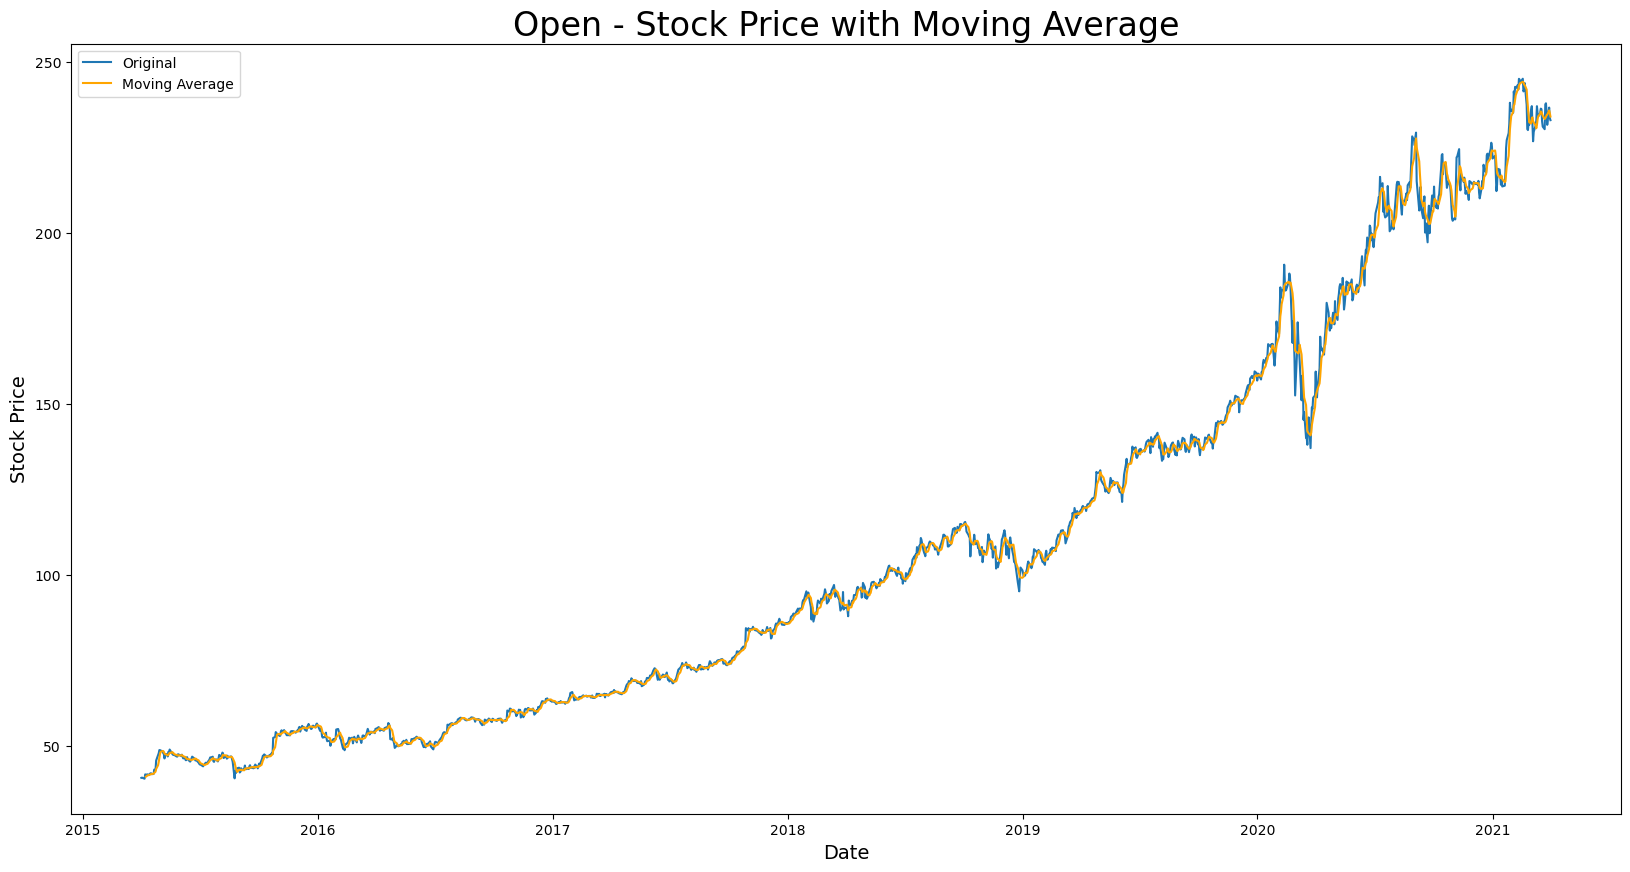

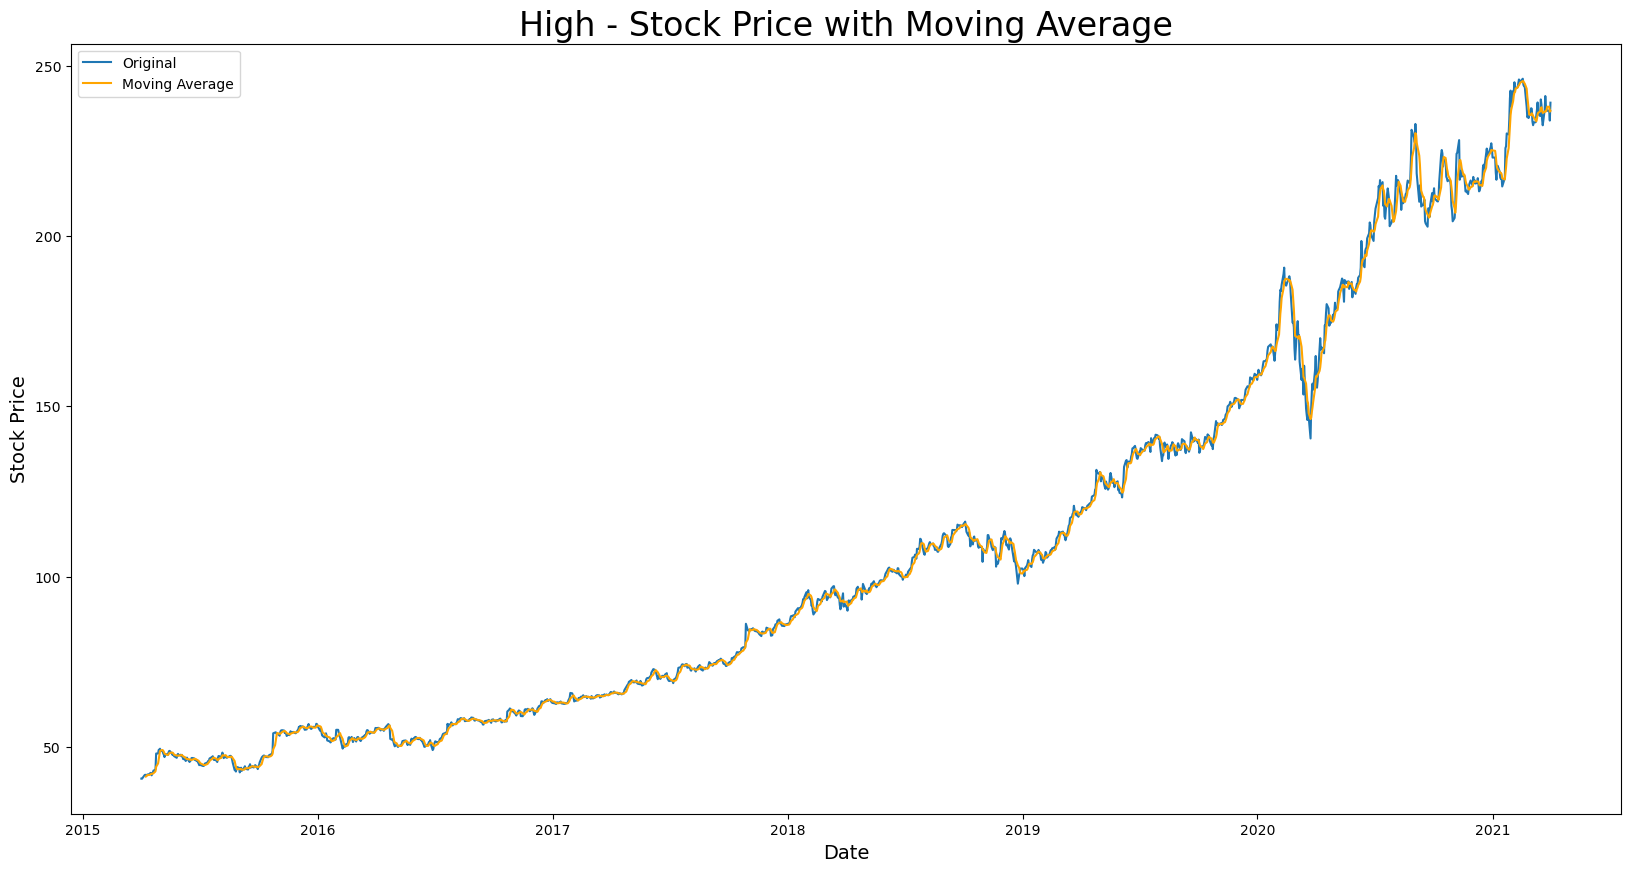

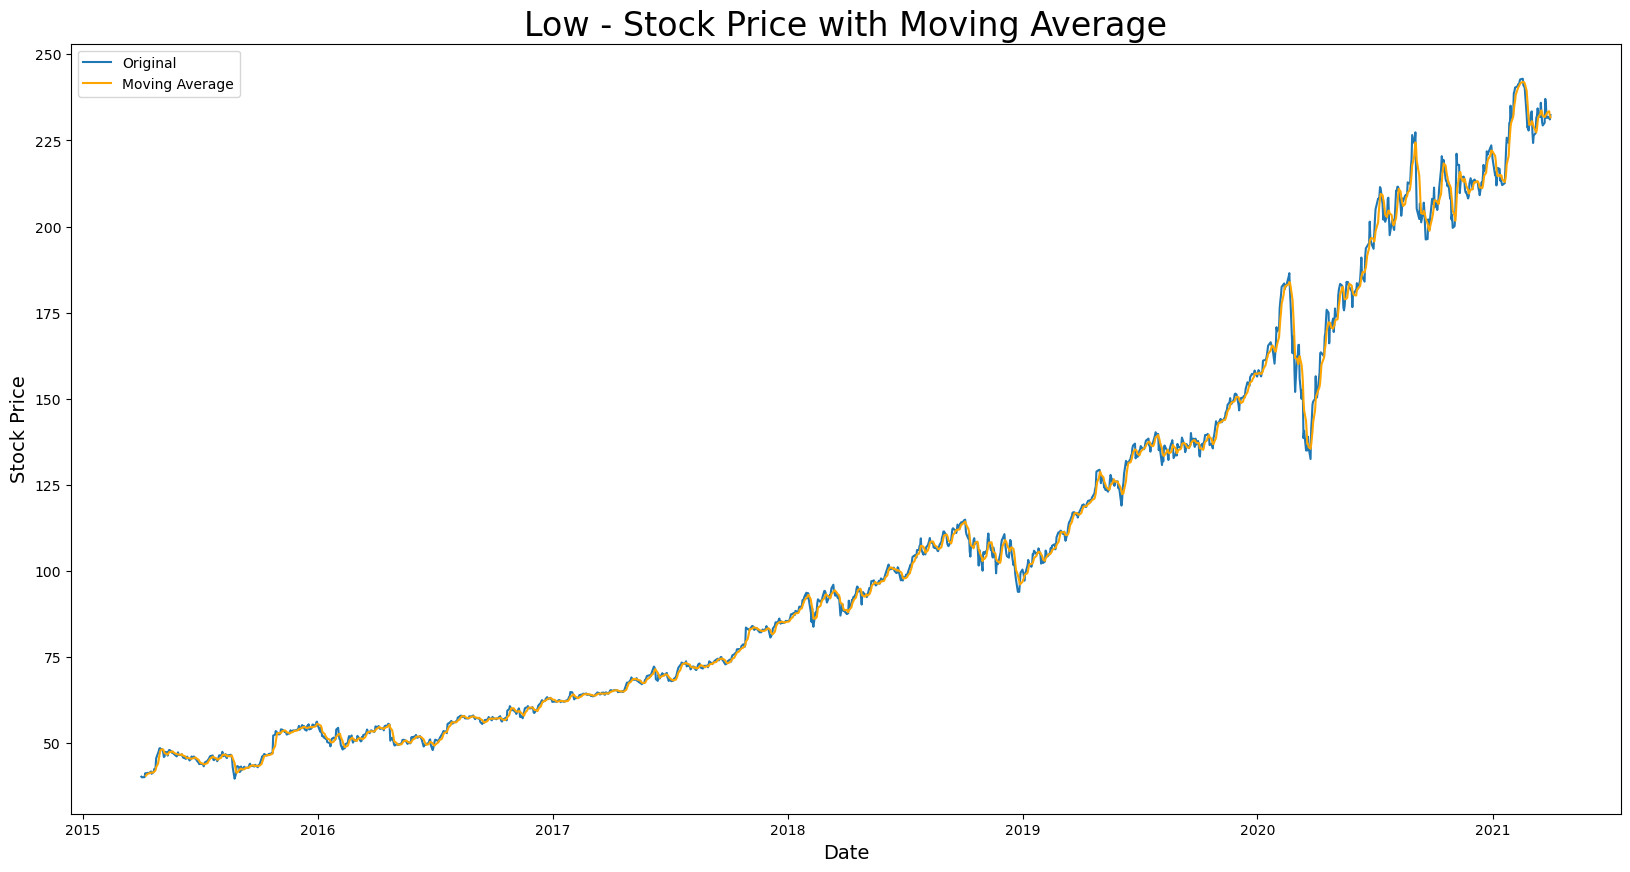

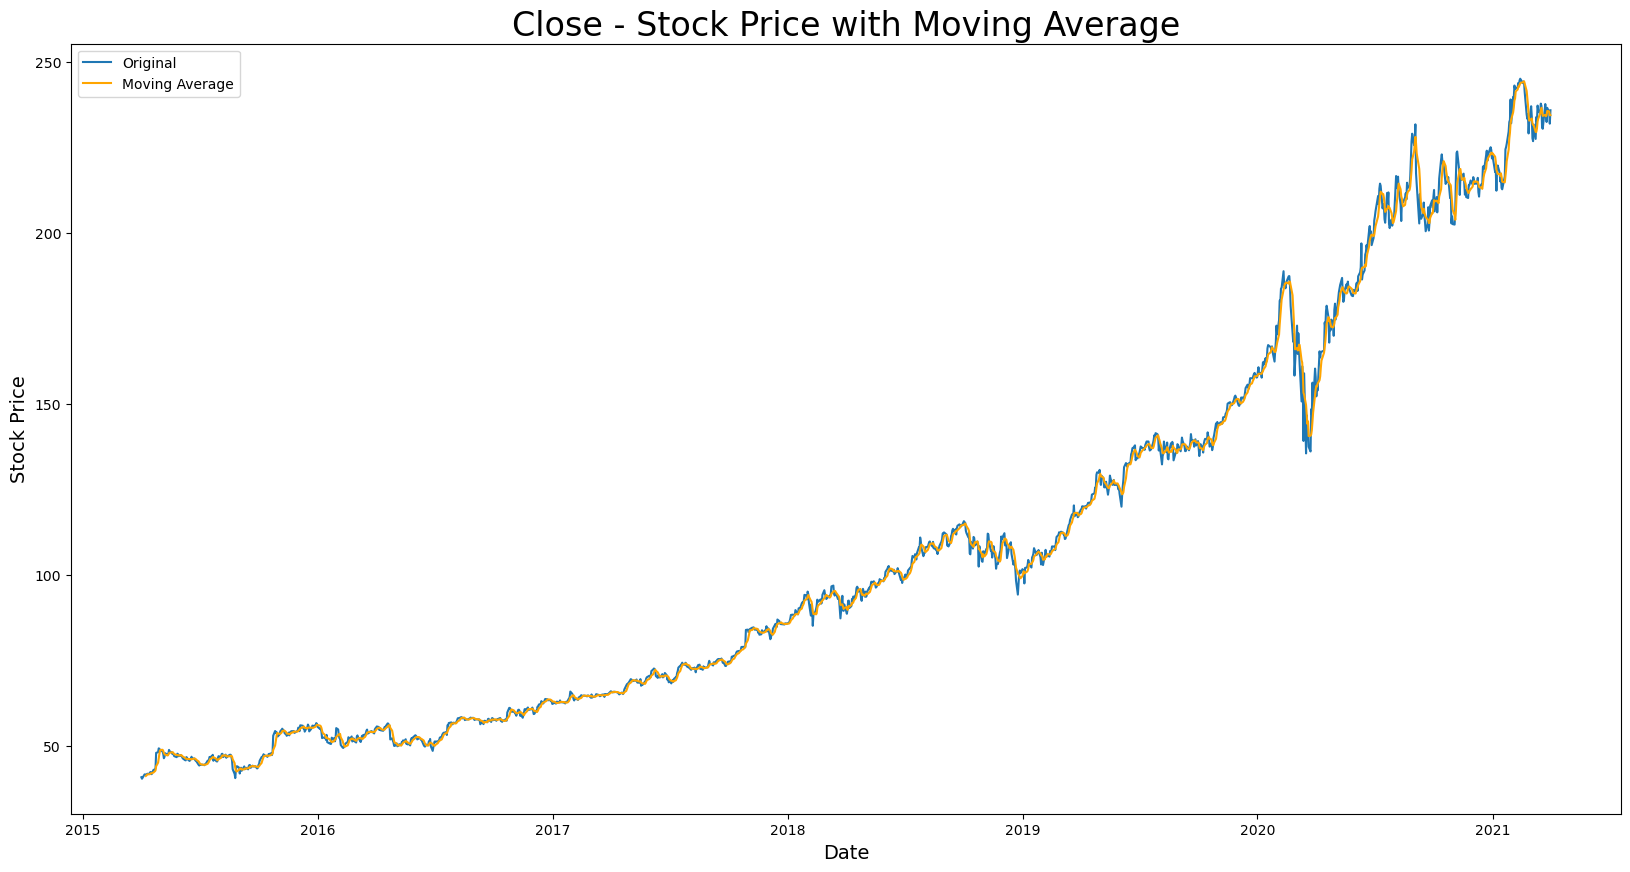

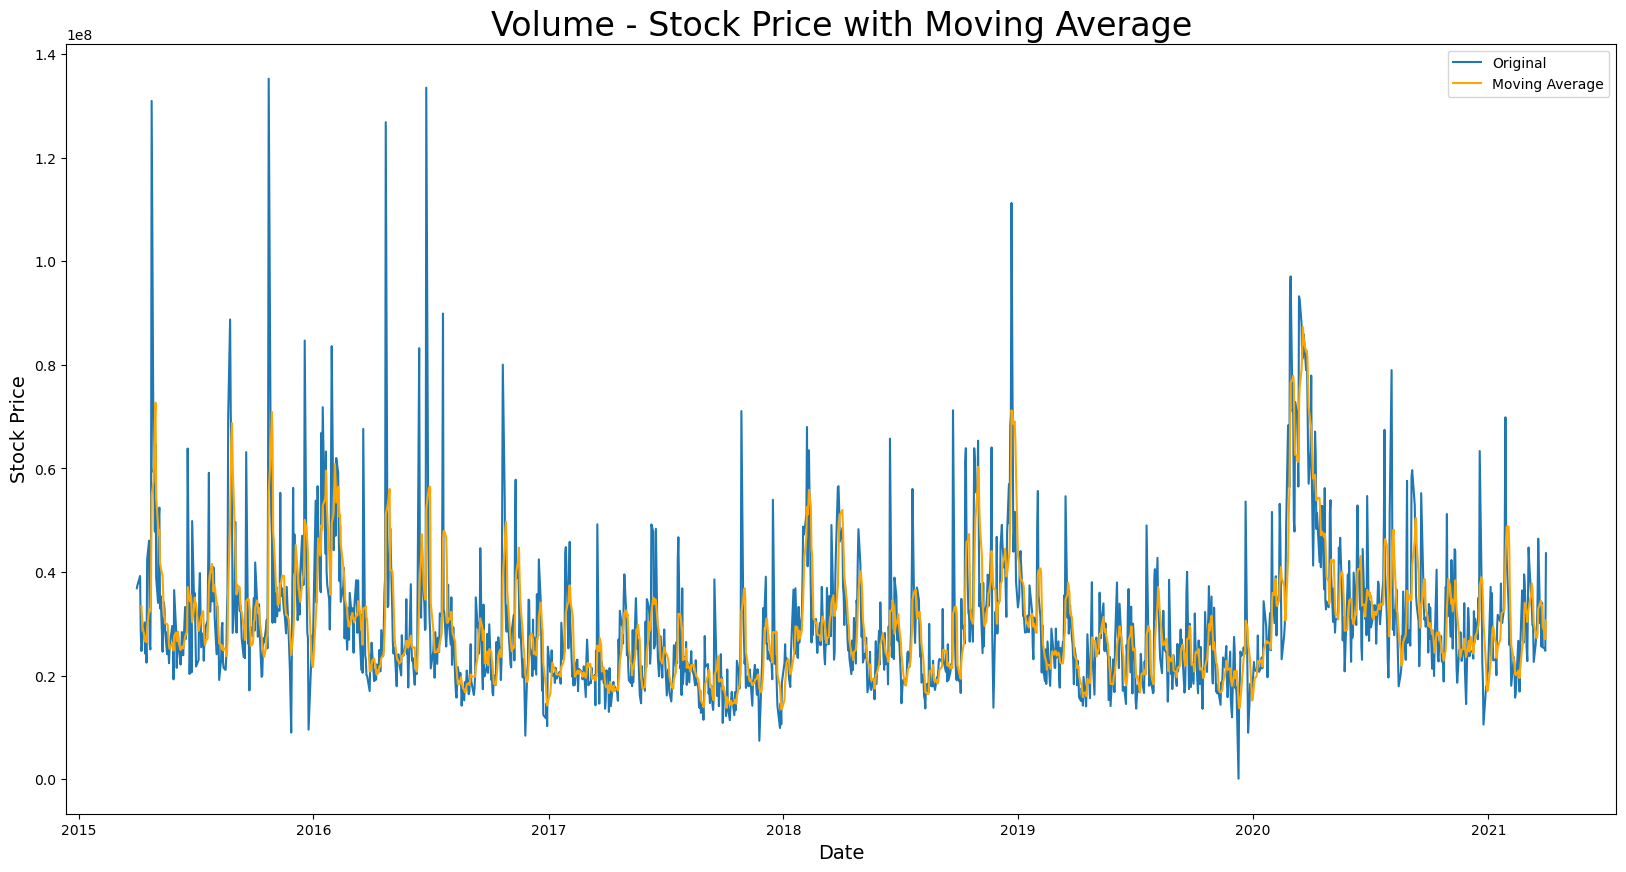

In [66]:
# Applying a simple moving average with window size 5
df_ma = df.rolling(window=5).mean()

for col in df.columns:
    plt.figure(figsize=(20, 10))
    
    # Plotting original data
    sns.lineplot(x=df.index, y=df[col], label='Original')
    
    # Plotting moving average
    sns.lineplot(x=df_ma.index, y=df_ma[col], label='Moving Average', color='orange')
    
    plt.title(f'{col} - Stock Price with Moving Average', fontsize=24)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Stock Price', fontsize=14)
    plt.legend()
    plt.show()

##### Trends

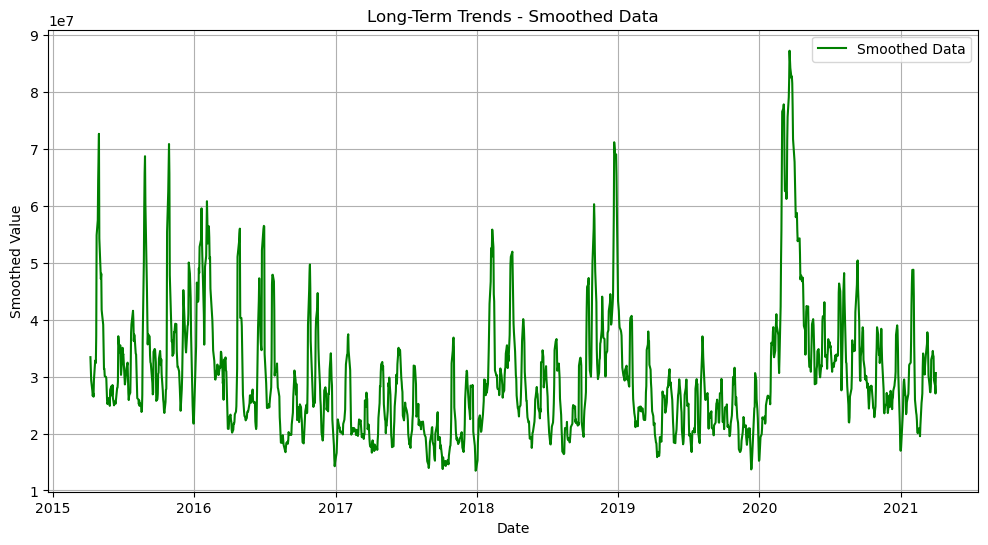

In [67]:
# Applying a simple moving average with window size 5
df_ma = df.rolling(window=5).mean()

# Plotting the long-term trends for the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df_ma.index, df_ma[col], label='Smoothed Data', color='green')
plt.title('Long-Term Trends - Smoothed Data')
plt.xlabel('Date')
plt.ylabel('Smoothed Value')
plt.legend()
plt.grid(True)
plt.show()


##### Standard deviation

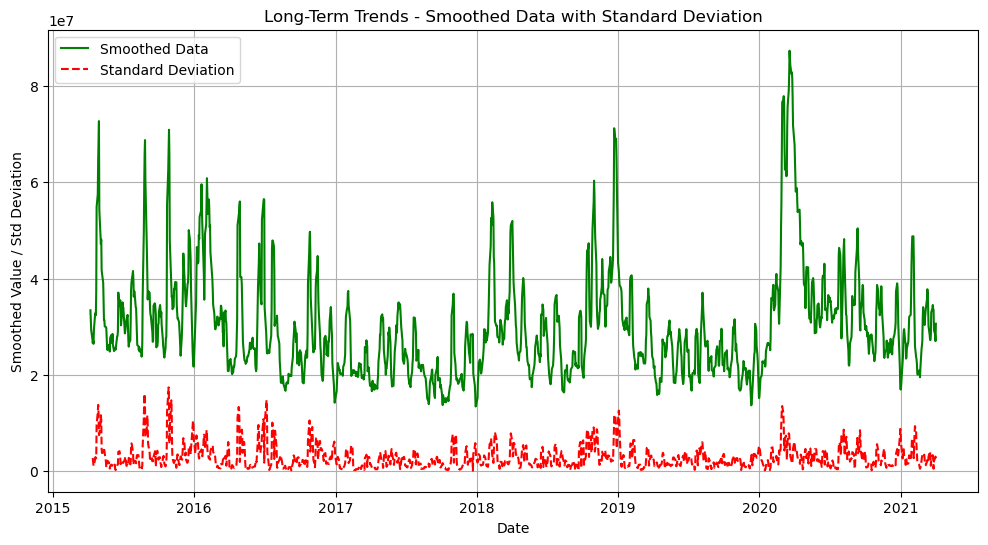

In [68]:
# Calculating the standard deviation of the smoothed data
std_smoothed_data = df_ma[col].rolling(window=5).std()

# Plotting the long-term trends for the smoothed data and its standard deviation
plt.figure(figsize=(12, 6))

plt.plot(df_ma.index, df_ma[col], label='Smoothed Data', color='')
plt.plot(df_ma.index, std_smoothed_data, label='Standard Deviation', color='red', linestyle='--')

plt.title('Long-Term Trends - Smoothed Data with Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Smoothed Value / Std Deviation')
plt.legend()
plt.grid(True)
plt.show()

##### Comparaison with Seasonal and Residual components

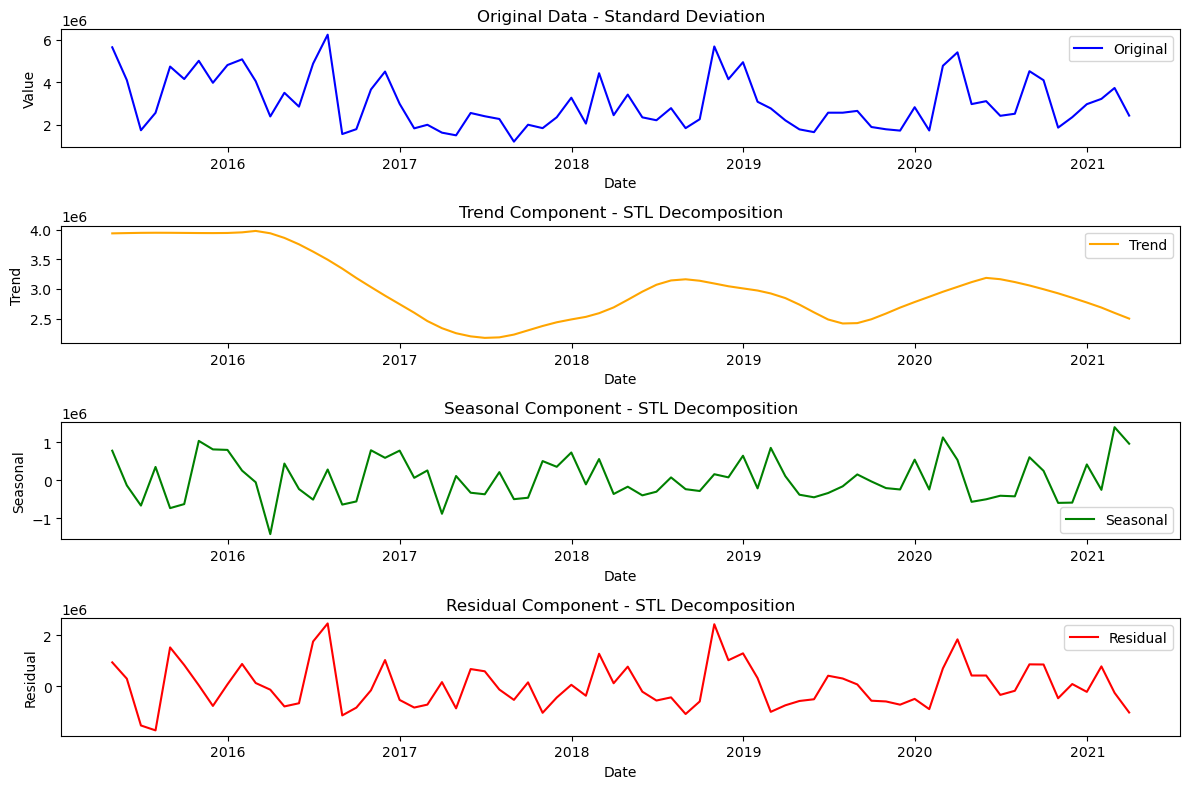

In [91]:
# Resampling the data to monthly frequency and filling missing values forward
std_smoothed_data = std_smoothed_data.resample('M').mean().ffill()

# Ensure 'std_smoothed_data' is a valid time series with datetime index
std_smoothed_data.index = pd.to_datetime(std_smoothed_data.index)

# Perform STL decomposition on the standard deviation data
stl = STL(std_smoothed_data, seasonal=13)  # Adjust seasonal period as needed
result = stl.fit()

# Plotting the components from STL decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(std_smoothed_data.index, std_smoothed_data, label='Original', color='blue')
plt.title('Original Data - Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(412)
plt.plot(std_smoothed_data.index, result.trend, label='Trend', color='orange')
plt.title('Trend Component - STL Decomposition')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

plt.subplot(413)
plt.plot(std_smoothed_data.index, result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component - STL Decomposition')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(std_smoothed_data.index, result.resid, label='Residual', color='red')
plt.title('Residual Component - STL Decomposition')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()

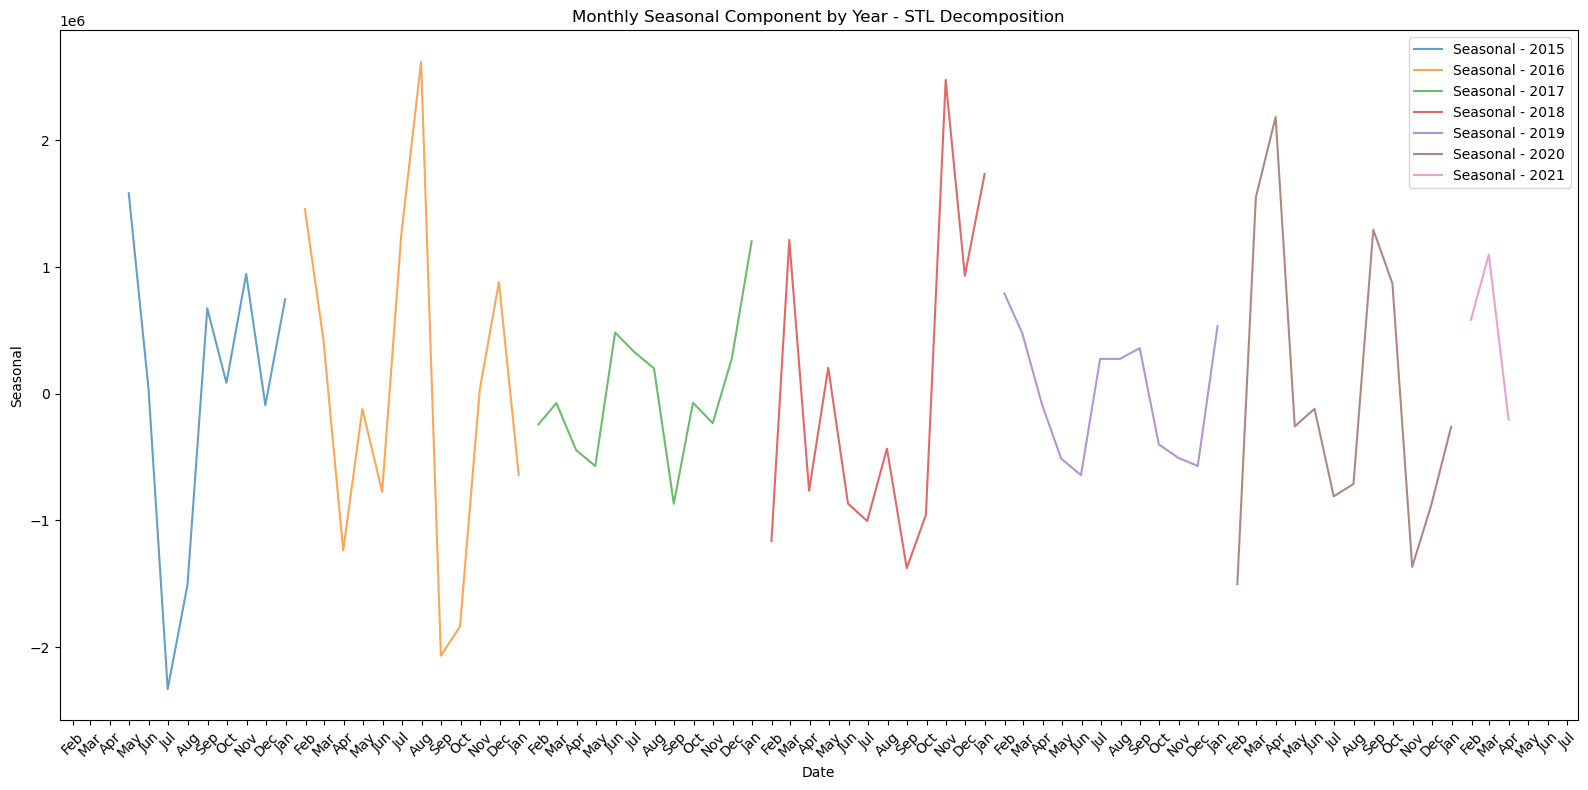

In [89]:
# Plotting the seasonal component by months for each year
plt.figure(figsize=(16, ))

for year in years:
    data_year = std_smoothed_data[std_smoothed_data.index.year == year]
    
    # Perform STL decomposition on the standard deviation data for each year
    stl = STL(data_year, seasonal=13)  # Decompose into monthly seasonality
    result = stl.fit()
    
    # Plotting the seasonal component from STL decomposition for each year
    plt.plot(data_year.index, result.seasonal, label=f'Seasonal - {year}', alpha=0.7)

# Formatting x-axis with month ticks
locator = MonthLocator()
formatter = DateFormatter("%b")  # Abbreviated month format

plt.title('Monthly Seasonal Component by Year - STL Decomposition')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [90]:
# Dictionary to hold mean seasonal components for each month
monthly_seasonal_mean = {month: [] for month in range(1, 13)}  # Initialize empty lists for each month

# Calculate mean seasonal component for each month across years
for year in years:
    data_year = std_smoothed_data[std_smoothed_data.index.year == year]
    
    # Perform STL decomposition on the standard deviation data for each year
    stl = STL(data_year, seasonal=13)  # Decompose into monthly seasonality
    result = stl.fit()
    
    # Aggregate seasonal component by month
    for i, month in enumerate(range(1, 13)):
        month_seasonal = result.seasonal[data_year.index.month == month]
        monthly_seasonal_mean[month].extend(month_seasonal)

# Calculate mean amplitude for each month
mean_amplitude = {month: abs(sum(values) / len(values)) for month, values in monthly_seasonal_mean.items()}

# Sorting months by their mean amplitudes
sorted_months = sorted(mean_amplitude.items(), key=lambda x: x[1], reverse=True)

# Display the sorted months by their mean amplitudes
print("Months sorted by mean amplitude (from most to least sensitive to seasonality):")
for month, amplitude in sorted_months:
    print(f"{month}: {amplitude}")


Months sorted by mean amplitude (from most to least sensitive to seasonality):
2: 782677.1925458213
12: 552987.1490586983
9: 384381.57069444656
6: 380640.08616698044
8: 330319.707493635
5: 313739.3223555349
10: 225417.1794622559
11: 93215.21458572098
3: 91803.0445165729
7: 74064.96802027636
4: 54957.97715925724
1: 12026.53280357578


-February (2) has the highest mean amplitude of seasonal variation, suggesting it experiences the most pronounced seasonal patterns or fluctuations in the data across the years.

-December (12) follows, indicating a significant level of seasonal variation but slightly less than February.

-September (9), June (6), and August (8) also show substantial seasonal patterns, though relatively lower than the top two months.

#### Model Prediction

###### Linear regression

In [94]:
# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume']  # Adjust as needed
target = 'Close'

# Extract features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets (e.g., 80% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict close prices using the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.8262175767781765
R-squared (R2): 0.9997385161658501


While linear regression often yields satisfactory outcomes, it tends to overlook the intricacies inherent in time series data. As a result, we aim to explore ARIMA, considering its ability to capture and model the complexities present within time series datasets more effectively.

##### ARIMA

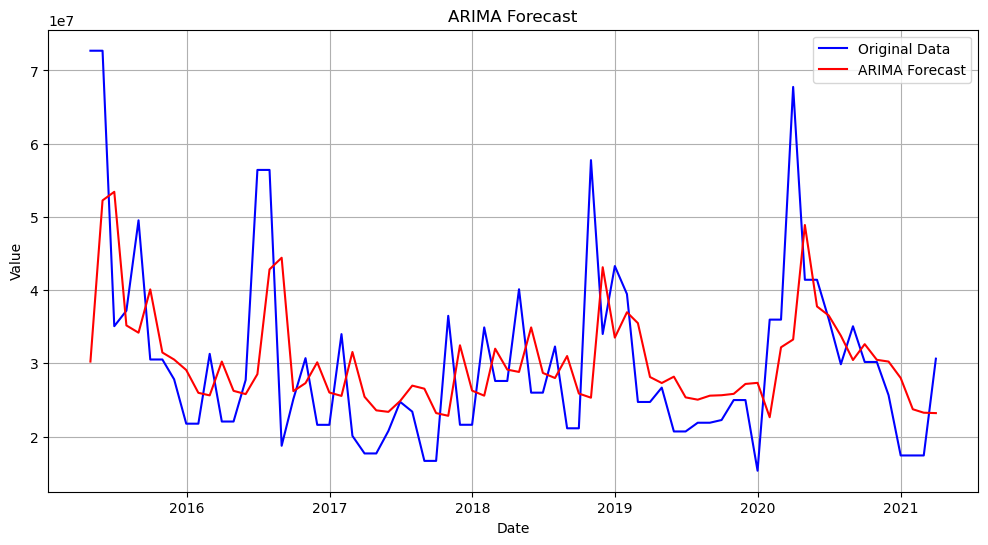

In [136]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (For example, using ARIMA(1,0,1))
model = ARIMA(df_ma[col], order=(1, 0, 1))
model_fit = model.fit()

# Generate forecast aligned with the index
forecast = model_fit.predict(start=df_ma.index[0], end=df_ma.index[-1])  

# Plotting original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df_ma.index, df_ma[col], label='Original Data', color='blue')
plt.plot(df_ma.index, forecast, label='ARIMA Forecast', color='red')

plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [138]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.6/654.6 kB 5.8 MB/s eta 0:00:00a 0:00:01


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1271.229
Date:                Mon, 01 Jan 2024   AIC                           2548.458
Time:                        21:12:07   BIC                           2555.288
Sample:                    04-30-2015   HQIC                          2551.177
                         - 03-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.646e+07   5.59e-10   2.94e+16      0.000    1.65e+07    1.65e+07
ar.L1          0.4707      0.024     19.345      0.000       0.423       0.518
sigma2      1.062e+14   3.45e-17   3.08e+30      0.0

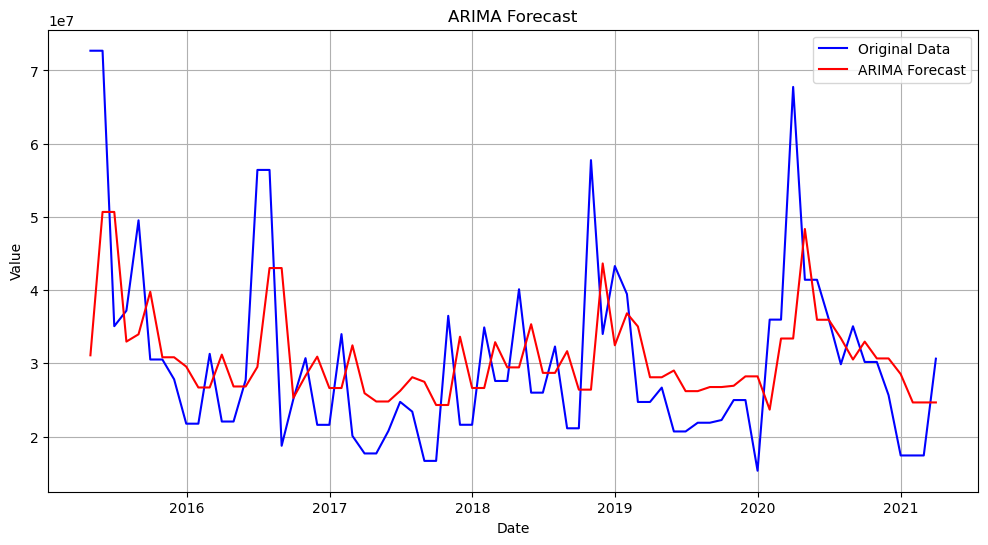

In [139]:
# SARIMAX
data = df_ma[col]

# Use auto_arima to find the best parameters
model = auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True)
print(model.summary())

# Fit the best ARIMA model found by auto_arima
model_fit = model.fit(data)

# Generate forecast aligned with the index
forecast = model_fit.predict_in_sample(start=0, end=len(data) - 1)

# Plotting original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df_ma.index, data, label='Original Data', color='blue')
plt.plot(df_ma.index, forecast, label='ARIMA Forecast', color='red')

plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Overall, the model seems to have a significant AR(1) coefficient, indicating a strong influence of the previous time point on the current value. However, further diagnostics may be needed to assess residual behavior and model adequacy thoroughly.

In conclusion, while the SARIMAX model presents promising results in capturing the temporal dependencies within the time series data, further enhancements could be explored to refine predictive capabilities. Considering the impact of seasonality and the intricate nature of time series data, additional testing using methods like Facebook Prophet, specifically designed to handle seasonality and trends, could offer valuable insights. Moreover, employing LSTM (Long Short-Term Memory) networks, known for their ability to capture temporal dependencies and nonlinear patterns in sequential data, might further improve the model's predictive performance. By leveraging these advanced techniques, addressing seasonality and the complexity inherent in time series data becomes more nuanced, potentially leading to more accurate and robust predictions.